**Name - Ayush Bokad**

**Roll no - 220299**

## Question 1

**RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h59m28.3566s, Dec +40° 44′ 02.096″)**

The published coordinates of Cygnus A are given for the J2000 epoch.  
Due to the precession of the Earth’s rotation axis, RA and Dec of celestial objects slowly change over time.

Using Astropy, the J2000 coordinates stored in `cygA_j2000` are transformed to the current epoch and stored in `cygA_today`.  
This shows a small but measurable change in the RA and Dec between J2000 and today.

In [17]:
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time

# Cygnus A (J2000)
cygA_j2000 = SkyCoord(
    ra="19h59m28.3566s",
    dec="+40d44m02.096s",
    frame=FK5(equinox=Time("J2000")))

# Current time
now = Time.now()

# Convert to today's epoch
cygA_today = cygA_j2000.transform_to(FK5(equinox=now))

print("J2000 RA :", cygA_j2000.ra)
print("J2000 Dec:", cygA_j2000.dec)
print("Today RA :", cygA_today.ra)
print("Today Dec:", cygA_today.dec)

J2000 RA : 299d52m05.349s
J2000 Dec: 40d44m02.096s
Today RA : 300d05m37.28659124s
Today Dec: 40d48m23.07729136s


## Question 2

**What will be this source's azimuth and elevation when observing from IIT Kanpur?**

The location of the observer in IITK is defined using the variable `iitk`, which contains the latitude, longitude, and height of IIT Kanpur.  
Using the current time (`now`) and the updated coordinates of Cygnus A (`cygA_today`), the source position is converted to the Alt–Az coordinate system.

The resulting azimuth and elevation show how Cygnus A appears in the sky to an observer at IIT Kanpur at the current time.

In [18]:
from astropy.coordinates import EarthLocation, AltAz
import astropy.units as u

# IIT Kanpur location
iitk = EarthLocation(
    lat=26.5123*u.deg,
    lon=80.2329*u.deg,
    height=142*u.m)

# Convert to AltAz
cygA_altaz = cygA_today.transform_to(
    AltAz(obstime=now, location=iitk))

print("Azimuth  :", cygA_altaz.az)
print("Elevation:", cygA_altaz.alt)

Azimuth  : 345d08m56.71467275s
Elevation: -20d31m46.82475559s


## Question 3

**Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.**

The position of Cygnus A is computed over the next 24 hours using the time array `times_path`.  
At each time step, the source is transformed to the Alt–Az frame and stored in `path`.

For the polar plot:
- Angle: Azimuth (0° = North, increasing clockwise)
- Radius: Zenith distance = 90° − Elevation  
  (center = zenith, outer edge = horizon)

Only the portion of the track where the source is above the horizon is plotted.  
The curve shows the daily sky path of Cygnus A due to Earth’s rotation.

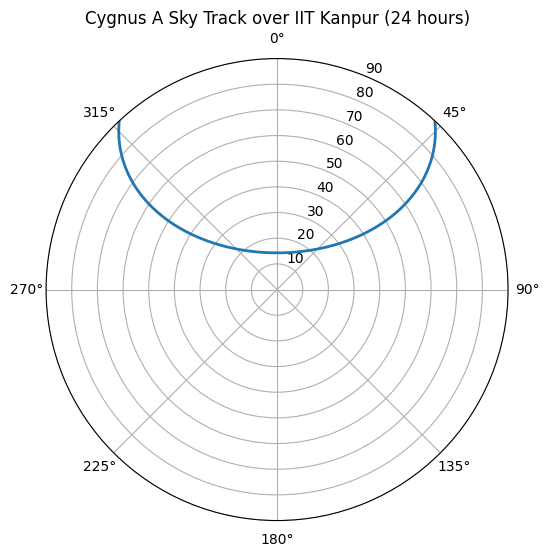

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import AltAz
import astropy.units as u

# 24-hour time range
times_path = now + np.linspace(0, 24, 500) * u.hour

# Convert to AltAz
path = cygA_today.transform_to(
    AltAz(obstime=times_path, location=iitk))

# Only plot when above horizon
mask = path.alt > 0*u.deg

# Polar plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Radius = zenith distance
ax.plot(path.az[mask].radian, 90 - path.alt[mask].degree, linewidth=2)

ax.set_rmax(90)
plt.title("Cygnus A Sky Track over IIT Kanpur (24 hours)")
plt.show()

## Question 4

**Plot how Sun's RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?**

The Sun’s RA and Dec are computed daily over one year using `get_sun(times_year)` and transformed to the FK5 J2000 frame as they change significantly over the year. The RA and Dec of Cygnus A (`cygA_j2000`) are used as constant reference values.

From the plots:
- The Sun’s RA and Dec vary significantly over the year
- Cygnus A remains nearly constant, with only very small changes due to precession

This comparison shows the difference between the Sun and Cygnus A.

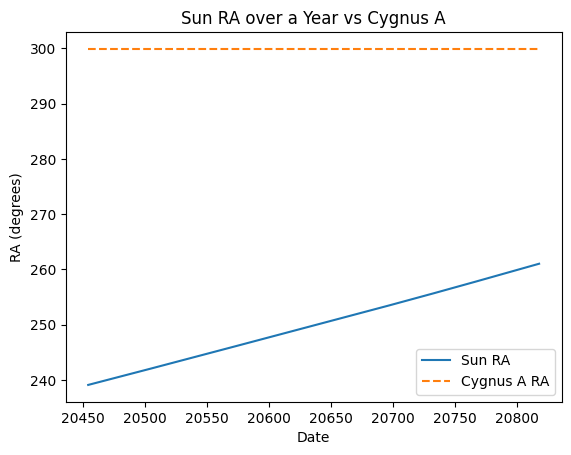

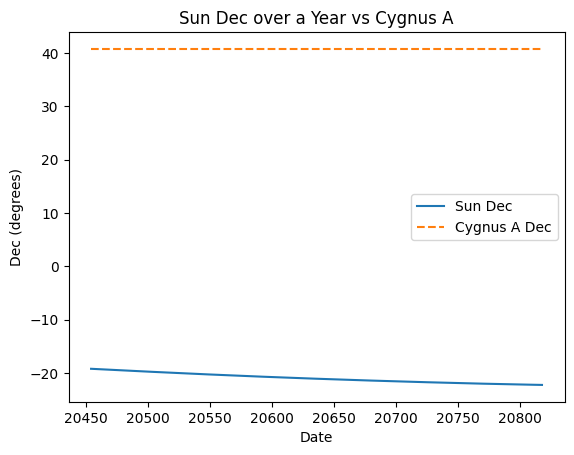

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import get_sun, FK5
from astropy.time import Time
import astropy.units as u

# One year (daily)
year = Time.now().datetime.year
times_year = Time(
    np.linspace(Time(f"{year}-01-01").jd,
                Time(f"{year}-12-31").jd,
                365),
    format="jd")

# Sun coordinates in FK5 (J2000)
sun = get_sun(times_year).transform_to(FK5(equinox=Time("J2000")))

# Cygnus A reference
cygA_ra = cygA_j2000.ra.degree
cygA_dec = cygA_j2000.dec.degree

# RA comparison
plt.figure()
plt.plot(times_year.plot_date,
         sun.ra.wrap_at(360*u.deg).degree,
         label="Sun RA")
plt.plot(times_year.plot_date,
         np.full(len(times_year), cygA_ra),
         "--", label="Cygnus A RA")
plt.xlabel("Date")
plt.ylabel("RA (degrees)")
plt.title("Sun RA over a Year vs Cygnus A")
plt.legend()
plt.show()

# Dec comparison
plt.figure()
plt.plot(times_year.plot_date,
         sun.dec.degree,
         label="Sun Dec")
plt.plot(times_year.plot_date,
         np.full(len(times_year), cygA_dec),
         "--", label="Cygnus A Dec")
plt.xlabel("Date")
plt.ylabel("Dec (degrees)")
plt.title("Sun Dec over a Year vs Cygnus A")
plt.legend()
plt.show()